## **Clasificación de textos por temas** LDA

In [58]:
# Se importan las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import textwrap
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [59]:
# Se descargan los stopwords
nltk.download('stopwords')
# stopwords cumple con la función de eliminar las palabras que no son relevantes para la clasificación

# Se guardan los stopwords en español en una variable
stop_words = stopwords.words('spanish')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\insit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [60]:
# Se importa el dataset
charlas_ted = pd.read_csv('ted.csv')

# Se imprime el dataset
print(charlas_ted.head())


                                 URL  ID                                URL.1  \
0  http://www.ted.com/talks/view/id/   1   http://www.ted.com/talks/view/id/1   
1  http://www.ted.com/talks/view/id/  92  http://www.ted.com/talks/view/id/92   
2  http://www.ted.com/talks/view/id/  66  http://www.ted.com/talks/view/id/66   
3  http://www.ted.com/talks/view/id/  53  http://www.ted.com/talks/view/id/53   
4  http://www.ted.com/talks/view/id/   7   http://www.ted.com/talks/view/id/7   

            Speaker                                               Name  \
0           Al Gore                  15 ways to avert a climate crisis   
1      Hans Rosling  Debunking third-world myths with the best stat...   
2  Sir Ken Robinson                        Do schools kill creativity?   
3     Majora Carter                                Greening the ghetto   
4       David Pogue            When it comes to tech, simplicity sells   

                                         Description    Event Durati

In [61]:
# Seleccionar la primera fila del dataset de la columna 'description'
charlas_ted['Description'][0]


'With the same humor and humanity he exuded in An Inconvenient Truth, Al Gore spells out 15 ways that individuals can address climate change immediately, from buying a hybrid to inventing a new, hotter "brand name" for global warming.'

In [62]:
# Se vectoriza el texto
vectorizer = CountVectorizer(stop_words=stop_words)

# Se transforma el texto en una matriz de palabras
X = vectorizer.fit_transform(charlas_ted['Description'])

# Se imprime la matriz de palabras
X


<1755x12078 sparse matrix of type '<class 'numpy.int64'>'
	with 66905 stored elements in Compressed Sparse Row format>

In [63]:
# Se crea un modelo LDA
lda = LatentDirichletAllocation(n_components=10, random_state=12345)

# random_state es un parámetro que controla la aleatoriedad del modelo

# Se ajusta el modelo LDA a la matriz de palabras
lda.fit(X)


LatentDirichletAllocation(random_state=12345)

In [64]:
# Funcion para graficar los temas
def graficar_palabras_top(model, feature_names, n_top_words=10):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Tema {topic_idx + 1}', fontdict={'fontsize': 30})
        ax.invert_yaxis()
        
        ax.tick_params(axis='both', which='major', labelsize=10)
        
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle('Temas de las charlas de TED', fontsize=40)
        
        plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
        plt.show()


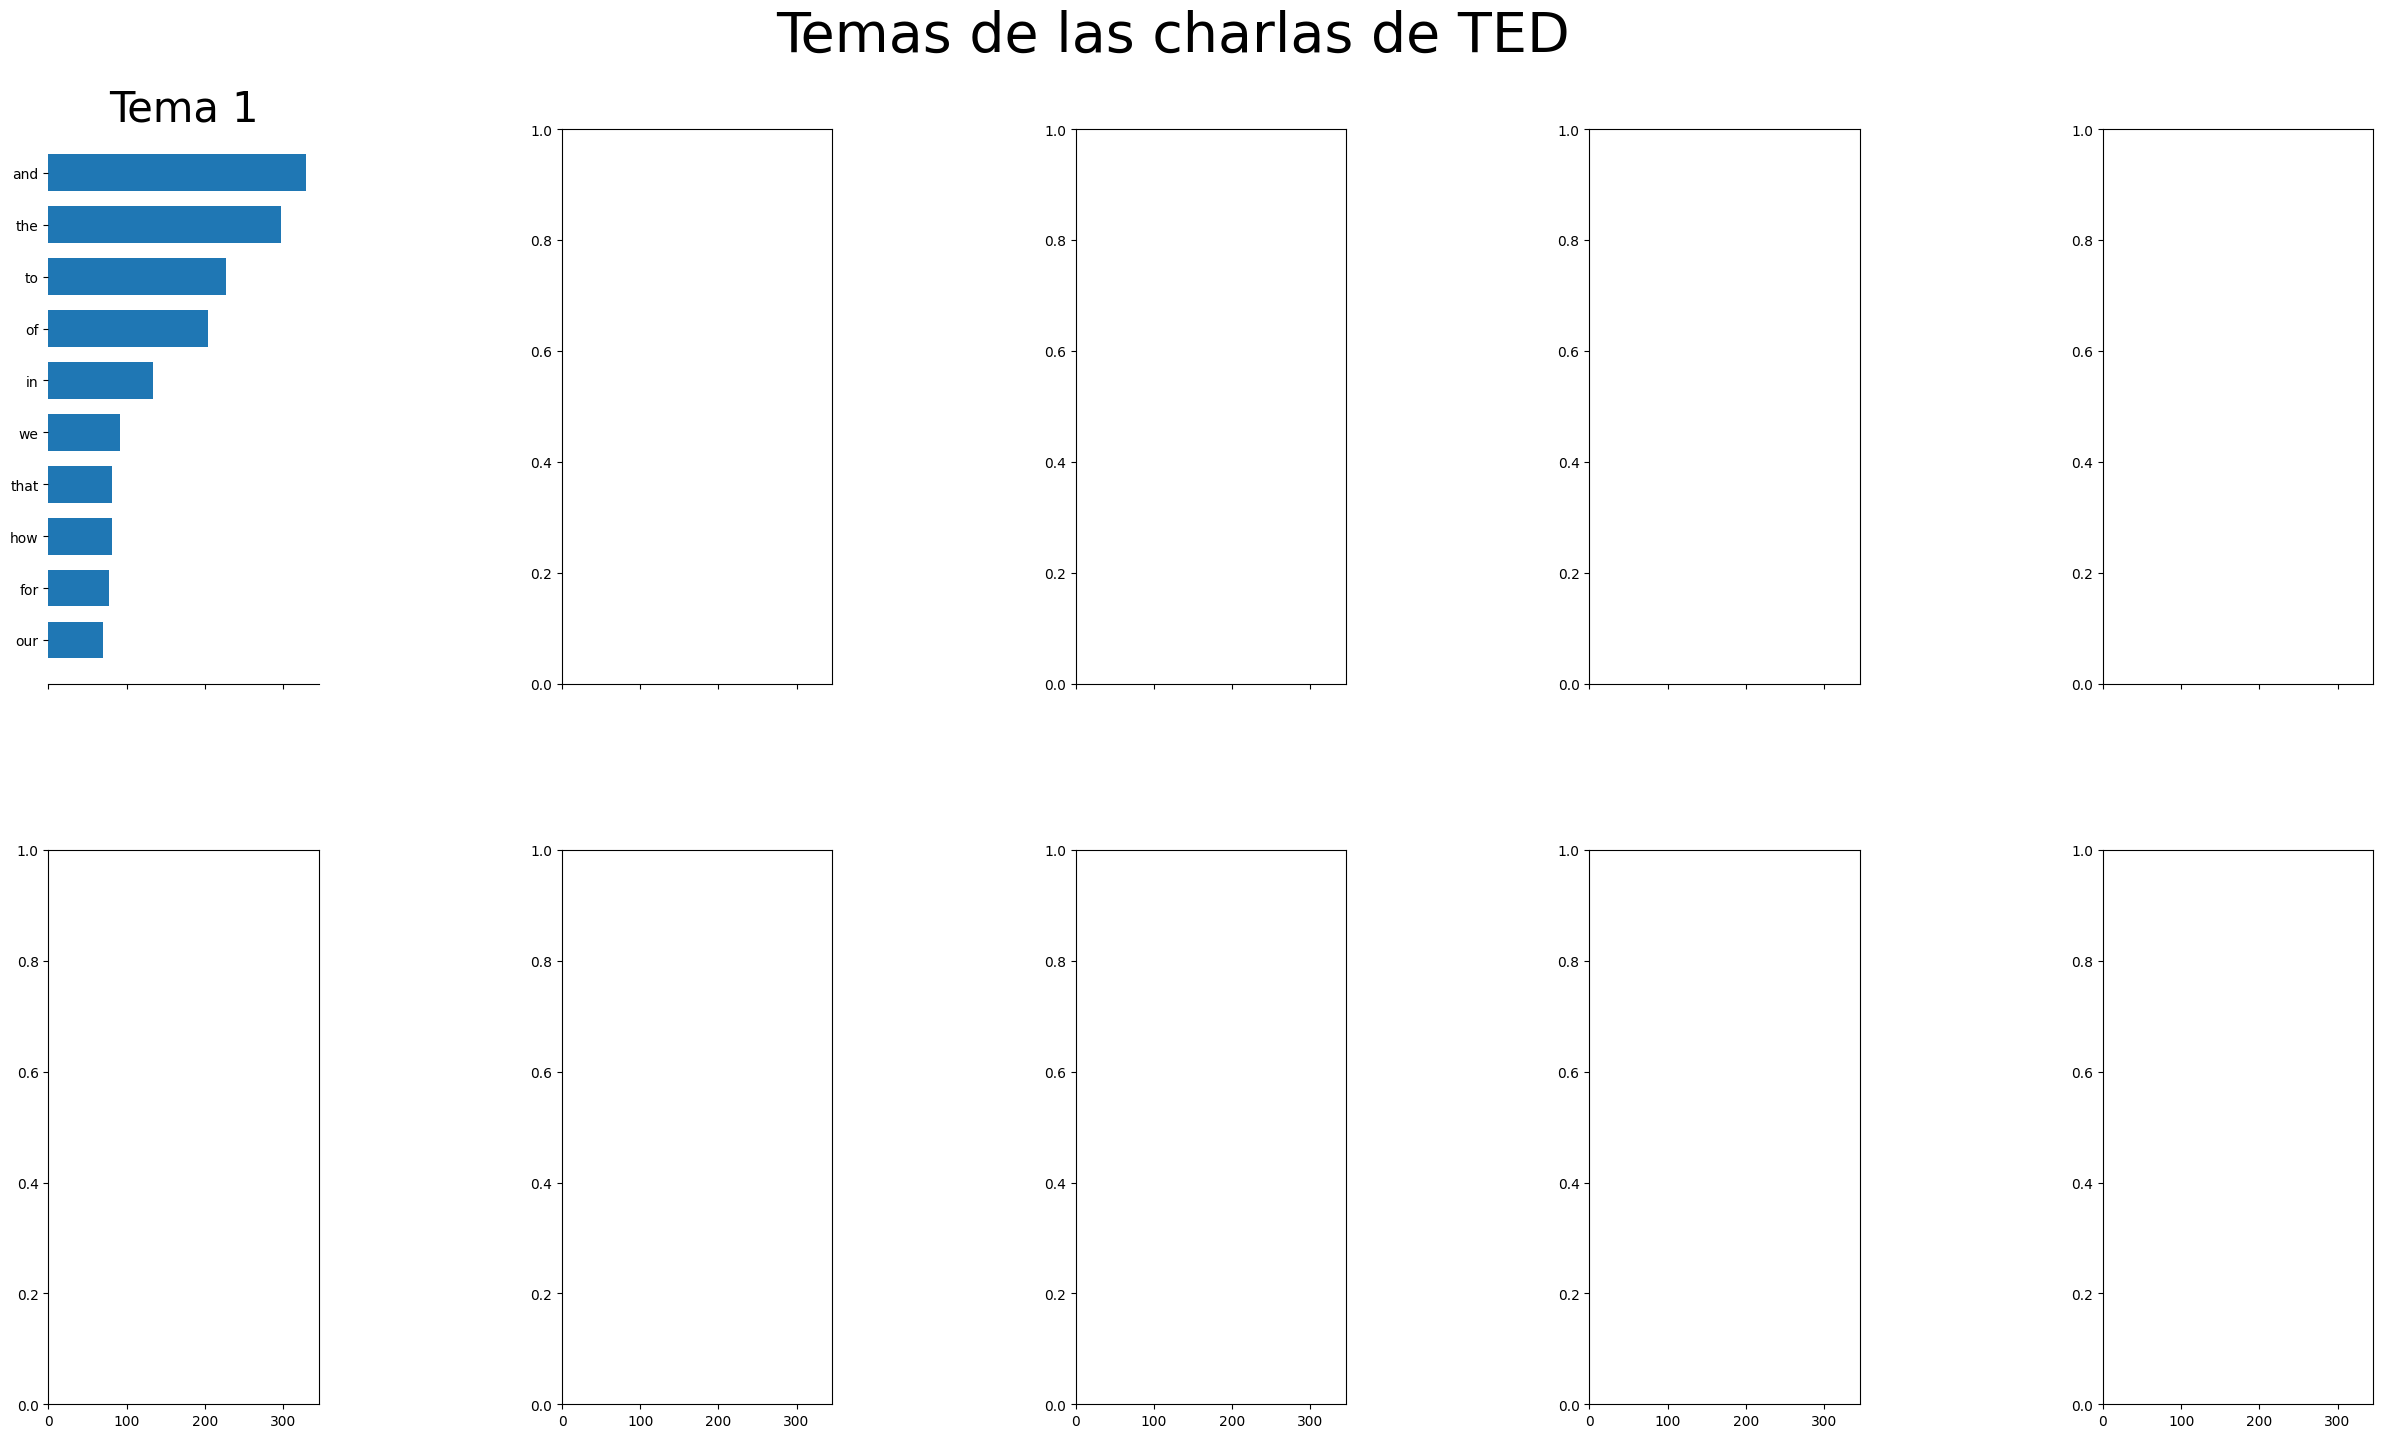

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [65]:
# Obtener los nombres de las características del vectorizador
feature_names = vectorizer.get_feature_names_out()

# Graficar los temas
graficar_palabras_top(lda, feature_names)

In [69]:
Z = lda.transform(X)

# Se imprime el número de temas
print(f"Número de temas: {lda.n_components}")



Número de temas: 10
